In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.datasets import make_classification

In [19]:
samples = pd.read_csv("sample_list.csv",sep=';') #load sample list
df = pd.DataFrame(samples)
samples_df = df[['Sample', 'Disease']]
samples_df.head()

,Sample,Disease
0,Sample_0001_Non-LCa,Non-LCa
1,Sample_0002_Non-LCa,Non-LCa
2,Sample_0003_LCa,LCa
3,Sample_0004_Non-LCa,Non-LCa
4,Sample_0005_Non-LCa,Non-LCa


In [20]:
mirnas = pd.read_csv("norm_data__non_log.txt",sep='\t') #load miRNAs

In [21]:
mirnas.head()

,Sample_0001_Non-LCa,Sample_0002_Non-LCa,Sample_0003_LCa,Sample_0004_Non-LCa,Sample_0005_Non-LCa,Sample_0006_Non-LCa,Sample_0007_Non-LCa,Sample_0008_Non-LCa,Sample_0009_Non-LCa,Sample_0010_Non-LCa,...,Sample_3037_Non-LCa,Sample_3038_Non-LCa,Sample_3039_Non-LCa,Sample_3040_Non-LCa,Sample_3041_Non-LCa,Sample_3042_Non-LCa,Sample_3043_LCa,Sample_3044_Non-LCa,Sample_3045_Non-LCa,Sample_3046_Non-LCa
feature-0001,8.500863,9.941665,8.468764,8.519110,7.695362,8.511572,9.806796,8.111616,7.452919,7.578256,...,8.393852,9.336868,8.825555,11.023160,7.890167,8.842462,6.860710,7.650270,7.415795,7.797602
feature-0002,8.001125,8.064157,7.945632,7.428407,7.969229,7.596385,7.350761,7.766351,7.596385,7.501078,...,7.974236,7.603061,7.046157,7.239167,7.988912,8.037061,8.251054,7.385154,7.998785,8.003537
feature-0003,28.747845,15.727566,35.426976,13.942995,33.991915,36.450612,7.784135,28.747845,62.300418,16.526670,...,35.426976,43.689084,38.073203,15.543100,34.456610,38.622678,43.689084,59.966780,89.553106,30.980816
feature-0004,9.941665,12.098506,10.311829,14.085761,11.822439,10.815340,23.271599,9.806796,10.024888,10.592802,...,9.100630,12.870063,11.323305,12.442595,12.293139,9.982537,11.171948,9.469426,8.069276,9.842943
feature-0005,7.589673,8.853987,7.648110,8.174631,8.940175,8.519110,9.304344,7.806593,9.084872,9.038317,...,7.589673,8.565147,8.245406,8.203915,7.315470,8.342968,8.871970,7.269378,8.448181,7.764134


In [22]:
mirnas_df=mirnas.T

In [23]:
mirnas_df.head()

,feature-0001,feature-0002,feature-0003,feature-0004,feature-0005,feature-0006,feature-0007,feature-0008,feature-0009,feature-0010,...,feature-1174,feature-1175,feature-1176,feature-1177,feature-1178,feature-1179,feature-1180,feature-1181,feature-1182,feature-1183
Sample_0001_Non-LCa,8.500863,8.001125,28.747845,9.941665,7.589673,8.679772,7.804306,13.542269,7.080440,21.135280,...,7.713066,7.652475,7.600870,9.076837,7.395667,85.931773,303.242753,8.960097,12.928830,8.549728
Sample_0002_Non-LCa,9.941665,8.064157,15.727566,12.098506,8.853987,9.100630,8.214993,13.105117,6.445316,14.939257,...,7.312545,6.763480,7.455388,8.444764,7.232966,73.140879,179.976799,8.814242,19.714151,8.259411
Sample_0003_LCa,8.468764,7.945632,35.426976,10.311829,7.648110,8.761466,7.772970,16.314979,7.489190,27.411820,...,7.750865,7.326394,7.757589,8.493571,9.578714,30.190762,175.608275,8.084079,11.171948,8.751308
Sample_0004_Non-LCa,8.519110,7.428407,13.942995,14.085761,8.174631,8.049387,8.358423,12.596805,7.715340,21.532998,...,8.327567,7.860627,8.256623,9.406866,8.393852,20.942159,269.352082,8.410467,9.382674,8.185181
Sample_0005_Non-LCa,7.695362,7.969229,33.991915,11.822439,8.940175,8.101449,7.306996,9.092907,6.889294,39.199841,...,7.675295,8.303378,7.450536,11.606221,10.392308,18.084913,367.711493,7.670650,11.869036,13.737306


In [24]:
mirnas_df1 = mirnas_df.iloc[:,0:1183]  #selecting column from miRNS

In [25]:
samples_df.head()

,Sample,Disease
0,Sample_0001_Non-LCa,Non-LCa
1,Sample_0002_Non-LCa,Non-LCa
2,Sample_0003_LCa,LCa
3,Sample_0004_Non-LCa,Non-LCa
4,Sample_0005_Non-LCa,Non-LCa


In [26]:
samples_df1 = samples_df.iloc[:,-1] #output column

In [27]:
samples_df1.head()

0    Non-LCa
1    Non-LCa
2        LCa
3    Non-LCa
4    Non-LCa
Name: Disease, dtype: object

         Univariate Selection

          Features         Score
861   feature-0862  2.298243e+06
60    feature-0061  2.224120e+06
572   feature-0573  1.708709e+06
855   feature-0856  1.082321e+06
1135  feature-1136  7.871919e+05
461   feature-0462  6.237259e+05
852   feature-0853  5.698531e+05
1072  feature-1073  5.691676e+05
1047  feature-1048  4.934103e+05
532   feature-0533  4.792379e+05
272   feature-0273  4.258282e+05
1157  feature-1158  4.255120e+05
299   feature-0300  3.632446e+05
869   feature-0870  3.625550e+05
1087  feature-1088  3.595284e+05
28    feature-0029  3.129633e+05
432   feature-0433  2.968598e+05
597   feature-0598  2.713446e+05
975   feature-0976  2.709437e+05
696   feature-0697  2.681633e+05
366   feature-0367  2.628777e+05
410   feature-0411  2.616452e+05
811   feature-0812  2.543454e+05
1171  feature-1172  2.513917e+05
47    feature-0048  2.440689e+05
615   feature-0616  2.429623e+05
349   feature-0350  2.322512e+05
509   feature-0510  2.288162e+05
693   featur

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00052196 0.00048569 0.00031758 ... 0.00044756 0.00215371 0.00137928]


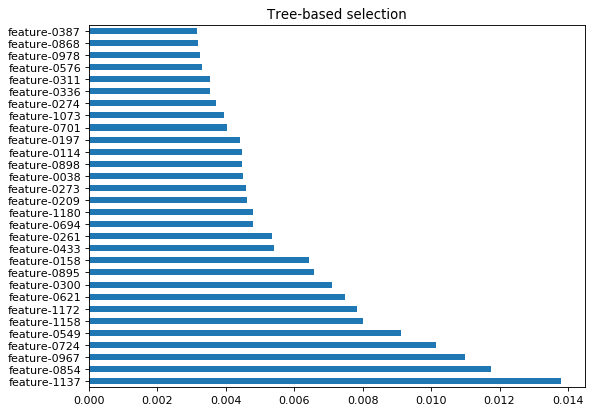

In [77]:
#Univariate feature selection
#apply SelectKBest
select_feature = SelectKBest(score_func=chi2, k=30)
fit = select_feature.fit(mirnas_df1,samples_df1)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(mirnas_df1.columns)
#concat two dataframes for better visualization 
Scores = pd.concat([dfcolumns,dfscores],axis=1)
Scores.columns = ['Features','Score']
#print best 30 features with scores
print('         Univariate Selection')
print('')
print(Scores.nlargest(30,'Score')) 


#Tree-based selection
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
Fimp_model = ExtraTreesClassifier()
Fimp_model.fit(mirnas_df1,samples_df1)
print(Fimp_model.feature_importances_) 
feat_imp = pd.Series(Fimp_model.feature_importances_, index=mirnas_df1.columns)
feat_imp.nlargest(30).plot(kind='barh')
plt.title('Tree-based selection')
plt.show()

In [78]:
#Univariate Selection
mirnas_final = mirnas_df.iloc[:,[861,60,572,855,1135,461,852,1072,1047,532,272, 1157,299,869,1087,28,432,597,975,696,366,410,811,1171,47,615,349,509,693,56]]

#Tree-based selection
mirnas_final2 = mirnas_df.iloc[:,[386,867,977,575,310,273,1072,700,196,113, 897,37,272,208,1179,693,260,432,157,894,299,620,1171,1157,548,723,966,853,1136]]

In [79]:
samples_df.head()

,Sample,Disease,sort
0,Sample_0001_Non-LCa,Non-LCa,0
1,Sample_0002_Non-LCa,Non-LCa,1
2,Sample_0003_LCa,LCa,2
3,Sample_0004_Non-LCa,Non-LCa,3
4,Sample_0005_Non-LCa,Non-LCa,4


In [80]:
#Univariate Selection
#merging dataset with label
mirnas_final['sort'] = np.arange(len(mirnas_final))
samples_df['sort'] = np.arange(len(samples_df))
tumor = pd.merge(mirnas_final, samples_df, on='sort')
tumor=tumor.drop(['sort', 'Sample'], axis=1)
tumor

C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,feature-0862,feature-0061,feature-0573,feature-0856,feature-1136,feature-0462,feature-0853,feature-1073,feature-1048,feature-0533,...,feature-0411,feature-0812,feature-1172,feature-0048,feature-0616,feature-0350,feature-0510,feature-0694,feature-0057,Disease
0,41952.033256,421.616343,9.671268,22.376270,1836.073925,240.164605,97451.08,51566.010063,1117.701164,2030.985635,...,1272.846143,78654.362393,10899.865321,25172.328277,4852.047676,45.10577,17426.343930,8877.773221,526.530771,Non-LCa
1,51566.010063,487.995814,14.304751,31.784270,1520.100091,167.063007,78654.36,64155.516126,1166.319710,1667.738585,...,2381.824951,97451.082712,4537.804180,15579.718505,2252.991761,41.66941,11776.639233,5923.636705,699.243150,Non-LCa
2,78654.362393,233.496656,12.392570,21.135280,2030.985635,87.753678,41952.03,97451.082712,1667.738585,1836.073925,...,163.148218,64155.516126,6759.712211,10181.488322,1931.978959,39.19984,7740.069116,1454.212060,132.276439,LCa
3,97451.082712,526.530771,12.814078,45.105766,4852.047676,303.242753,64155.52,78654.362393,3215.213719,4537.804180,...,204.279359,51566.010063,6759.712211,21787.992147,3921.622051,77.74549,19451.763434,1750.457384,175.608275,Non-LCa
4,64155.516126,144.962771,10.918152,38.622678,1931.978959,70.232501,51566.01,97451.082712,1391.284040,1454.212060,...,159.191944,78654.362393,6332.113000,12797.198194,2381.824951,24.26857,7236.077341,2139.988055,179.976799,Non-LCa
5,25172.328277,221.166944,12.442595,24.519648,3662.829238,95.204660,78654.36,51566.010063,2675.909520,3017.031921,...,285.644299,97451.082712,2381.824951,19451.763434,3426.570911,25.89271,15579.718505,4537.804180,209.703575,Non-LCa
6,51566.010063,2252.991761,16.013722,101.531000,15579.718505,526.530771,97451.08,78654.362393,10899.865321,17426.343930,...,506.227377,25172.328277,4852.047676,7740.069116,6759.712211,93.23252,5545.812159,1218.673358,618.348622,Non-LCa
7,51566.010063,303.242753,10.504247,24.788253,2381.824951,108.317860,64155.52,78654.362393,1589.539734,2528.247157,...,138.532377,97451.082712,6759.712211,21787.992147,3662.829238,48.21486,12797.198194,4221.131360,87.753678,Non-LCa
8,41952.033256,141.838948,9.736289,17.319737,2528.247157,74.636343,64155.52,78654.362393,1750.457384,2139.988055,...,135.366272,97451.082712,9512.632516,25172.328277,2842.786346,20.94216,11776.639233,3017.031921,189.249340,Non-LCa
9,41952.033256,159.191944,10.883412,16.422761,3662.829238,91.402416,64155.52,78654.362393,2528.247157,3215.213719,...,71.701452,97451.082712,7740.069116,30177.155110,3017.031921,14.23052,15579.718505,2381.824951,1272.846143,Non-LCa


In [81]:
#Tree-based selection
#merging dataset with label
mirnas_final2['sort'] = np.arange(len(mirnas_final2))
samples_df['sort'] = np.arange(len(samples_df))
tumor2 = pd.merge(mirnas_final2, samples_df, on='sort')
tumor2=tumor2.drop(['sort', 'Sample'], axis=1)
tumor2

C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Koushik\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,feature-0387,feature-0868,feature-0978,feature-0576,feature-0311,feature-0274,feature-1073,feature-0701,feature-0197,feature-0114,...,feature-0300,feature-0621,feature-1172,feature-1158,feature-0549,feature-0724,feature-0967,feature-0854,feature-1137,Disease
0,7.146528,194.08420,570.759918,123.477449,333.518499,30.980816,51566.010063,14.537191,863.312891,7.536709,...,3426.570911,8.242657,10899.865321,1331.192179,1454.212060,52.624270,4537.804180,7.374916,2842.786346,Non-LCa
1,7.301303,254.38630,344.643818,294.429095,643.661923,33.991915,64155.516126,9.371361,333.518499,7.477311,...,10181.488322,8.248260,4537.804180,7236.077341,4221.131360,126.322154,6759.712211,7.304179,2528.247157,Non-LCa
2,7.393043,406.81750,699.243150,254.386329,2381.824951,39.795825,97451.082712,20.942159,344.643818,8.486458,...,5192.811965,19.387335,6759.712211,9512.632516,3017.031921,204.279359,14023.704006,9.076837,21787.992147,LCa
3,7.887826,240.16460,593.611671,64.778140,1218.673358,33.526791,78654.362393,14.939257,285.644299,7.704209,...,2528.247157,10.504247,6759.712211,6332.113000,2381.824951,82.573232,8308.734807,7.927178,7236.077341,Non-LCa
4,7.735078,548.53820,699.243150,198.980660,1272.846143,39.795825,97451.082712,34.939524,570.759918,11.134332,...,9512.632516,17.948742,6332.113000,6759.712211,3426.570911,240.164605,21787.992147,10.419474,8308.734807,Non-LCa
5,7.306996,392.83750,828.206379,175.608275,194.084203,55.550968,51566.010063,36.976892,643.661923,12.596805,...,6332.113000,18.488887,2381.824951,2252.991761,1520.100091,85.931773,5192.811965,7.286962,2842.786346,Non-LCa
6,7.146528,23.75662,105.986607,42.994266,470.136340,35.937839,78654.362393,8.324640,215.350500,6.889294,...,3662.829238,18.488887,4852.047676,2675.909520,2528.247157,12.293139,21787.992147,6.829100,12797.198194,Non-LCa
7,7.585175,285.64430,943.273473,73.140879,1026.768110,42.994266,78654.362393,30.190762,406.817521,8.158548,...,3215.213719,11.961249,6759.712211,3426.570911,1931.978959,93.232516,11776.639233,6.784239,5923.636705,Non-LCa
8,7.257408,618.34860,730.608008,167.063007,1166.319710,27.738883,78654.362393,26.187105,470.136340,9.008083,...,4537.804180,13.737306,9512.632516,4221.131360,1520.100091,129.344959,8308.734807,8.648979,5923.636705,Non-LCa
9,7.735078,593.61170,487.995814,135.366272,643.661923,18.929496,78654.362393,28.405968,526.530771,9.108765,...,8877.773221,16.635275,7740.069116,7236.077341,670.918724,126.322154,12797.198194,8.321563,5923.636705,Non-LCa


In [82]:
#Univariate Selection
Disease = {'Non-LCa': 1,'LCa': 0}
tumor.Disease = [Disease[item] for item in tumor.Disease]

#Tree-based selection
Disease = {'Non-LCa': 1,'LCa': 0}
tumor2.Disease = [Disease[item] for item in tumor2.Disease]

In [83]:
#Univariate Selection
X_train, X_test, y_train, y_test = train_test_split(tumor.loc[:, tumor.columns != 'Disease'], tumor['Disease'], stratify=tumor['Disease'], random_state=50)

#Tree-based selection
X_train2, X_test2, y_train2, y_test2 = train_test_split(tumor2.loc[:, tumor2.columns != 'Disease'], tumor2['Disease'], stratify=tumor2['Disease'], random_state=50)

In [118]:
#Univariate Selection
#Build Neural Network
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

NNmodel = Sequential()
NNmodel.add(Dense(48, input_dim=X_train.shape[1],
                kernel_initializer='normal', activation="relu"))
NNmodel.add(Dropout(0.2))
NNmodel.add(Dense(24, activation="tanh"))
NNmodel.add(Dropout(0.3))
NNmodel.add(Dense(1))
NNmodel.add(Activation("sigmoid"))
NNmodel.compile(loss="binary_crossentropy", optimizer='adam')

history = NNmodel.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=64)

Train on 1827 samples, validate on 457 samples
Epoch 1/3
1827/1827 [==============================] - 2s 1ms/step - loss: 0.6725 - val_loss: 0.6305
Epoch 2/3
1827/1827 [==============================] - 0s 83us/step - loss: 0.6109 - val_loss: 0.5099
Epoch 3/3
1827/1827 [==============================] - 0s 74us/step - loss: 0.5645 - val_loss: 0.5451


In [117]:
#Tree-based selection
#Build Neural Network
adam = optimizers.adam(lr = 0.005, decay = 0.0000001)

NNmodel2 = Sequential()
NNmodel2.add(Dense(48, input_dim=X_train2.shape[1],kernel_initializer='normal',activation="relu"))
NNmodel2.add(Dropout(0.2))
NNmodel2.add(Dense(24,activation="tanh"))
NNmodel2.add(Dropout(0.3))
NNmodel2.add(Dense(1))
NNmodel2.add(Activation("sigmoid"))
NNmodel2.compile(loss="binary_crossentropy", optimizer='adam')

history2 = NNmodel2.fit(X_train2, y_train2, validation_split=0.2, epochs=3, batch_size=64)

Train on 1827 samples, validate on 457 samples
Epoch 1/3
1827/1827 [==============================] - 2s 1ms/step - loss: 0.6414 - val_loss: 0.5231
Epoch 2/3
1827/1827 [==============================] - 0s 77us/step - loss: 0.6019 - val_loss: 0.4950
Epoch 3/3
1827/1827 [==============================] - 0s 72us/step - loss: 0.5783 - val_loss: 0.5347


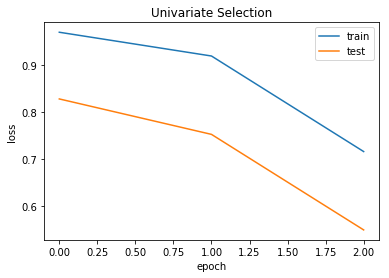

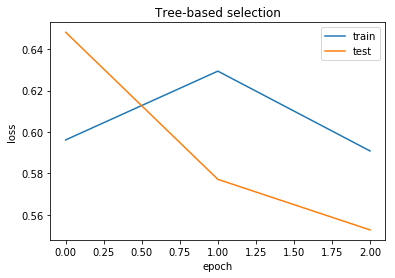

In [87]:
#Univariate Selection
#summarize history for loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Univariate Selection')
plt.show()

#Tree-based selection
# summarize history for loss
plt.figure()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.title('Tree-based selection')
plt.show()

In [88]:
#Univariate Selection
#Prediction on test set
predictions_NN_prob = NNmodel.predict(X_test)
predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.5, 1, 0) 


#Tree-based selection
#Prediction on test set
predictions_NN_prob2 = NNmodel2.predict(X_test2)
predictions_NN_prob2 = predictions_NN_prob2[:,0]

predictions_NN_012 = np.where(predictions_NN_prob2 > 0.5, 1, 0)

In [89]:
#Univariate Selection
acc_NN = accuracy_score(y_test, predictions_NN_01)
print('Univariate Selection, Accuracy:', acc_NN)

#Tree-based selection
acc_NN2 = accuracy_score(y_test2, predictions_NN_012)
print('Tree-based selection, Accuracy:', acc_NN2)

Univariate Selection, Accuracy: 0.7427821522309711
Tree-based selection, Accuracy: 0.8031496062992126


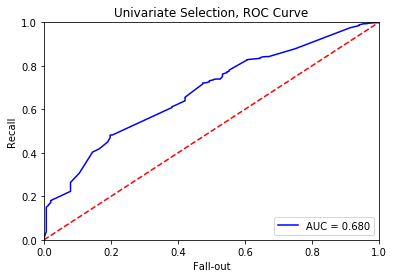

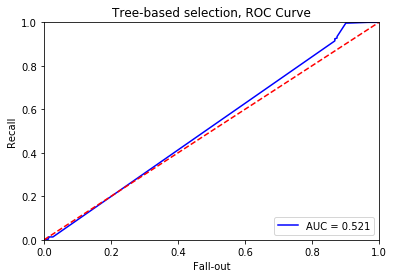

In [90]:
#Univariate Selection
#ROC Curve
false_positive_rate, recall, thresholds = roc_curve(y_test, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Univariate Selection, ROC Curve')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

#Tree-based selection
#ROC Curve
false_positive_rate2, recall2, thresholds2 = roc_curve(y_test2, predictions_NN_prob2)
roc_auc2 = auc(false_positive_rate2, recall2)
plt.figure()
plt.title('Tree-based selection, ROC Curve')
plt.plot(false_positive_rate2, recall2, 'b', label = 'AUC = %0.3f' %roc_auc2)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out')
plt.show()

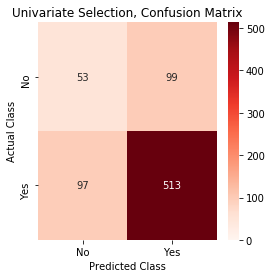

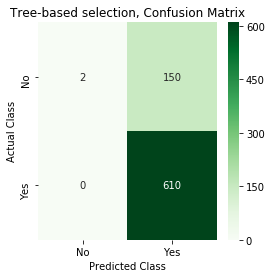

In [91]:
#Univariate Selection
#Confusion Matrix

cmatrix = confusion_matrix(y_test, predictions_NN_01)
labels = ['No', 'Yes']
plt.figure(figsize=(4,4))
sns.heatmap(cmatrix,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Reds", vmin = 0.3);
plt.title('Univariate Selection, Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

#Tree-based selection
#Confusion Matrix
cmatrix2 = confusion_matrix(y_test2, predictions_NN_012)
labels = ['No', 'Yes']
plt.figure(figsize=(4,4))
sns.heatmap(cmatrix2,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Greens", vmin = 0.3);
plt.title('Tree-based selection, Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

In [92]:
#Univariate Selection
sensitivity = cmatrix[0,0]/(cmatrix[0,0]+cmatrix[0,1])

#Tree-based selection
sensitivity2 = cmatrix2[0,0]/(cmatrix2[0,0]+cmatrix2[0,1])

In [94]:
#Univariate Selection
specificity = cmatrix[1,1]/(cmatrix[1,0]+cmatrix[1,1])

#Tree-based selection
specificity2 = cmatrix2[1,1]/(cmatrix2[1,0]+cmatrix2[1,1])

In [152]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


#Univariate Selection
printmd("**Univariate Feature Selection**")
print('Accuracy: %.3f' %  acc_NN)
print('AUC Value: %.3f' % roc_auc)
print('Specificity: %.3f' %  specificity)
print('Sensitivity: %.3f' % sensitivity)

print('')
#Tree-based selection/Random Forest
printmd("**Tree-based or Random Forest Feature Selection**")
print('Accuracy: %.3f' %  acc_NN2)
print('AUC Value: %.3f' % roc_auc2)
print('Specificity: %.3f' %  specificity2)
print('Sensitivity: %.3f' % sensitivity2)

**Univariate Feature Selection**

Accuracy: 0.743
AUC Value: 0.680
Specificity: 0.841
Sensitivity: 0.349



**Tree-based or Random Forest Feature Selection**

Accuracy: 0.803
AUC Value: 0.521
Specificity: 1.000
Sensitivity: 0.013
